# python을 활용한 model fitting 하기
python의 scipy library를 이용하여 어떻게 model을 fitting하는지 알아보겠습니다. 먼저 다양한 수학적 tool과 자료구조를 위해 numpy를 import하겠습니다. 그리고 model fitting을 위해 scipy.optimize에서 curve_fit을 import하겠습니다.

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## 일차방정식
def func(x, a, b):
    return a*x + b

# 0부터 10까지 100개의 구간
x = np.linspace(0, 10, 100)


In [5]:
y = func(x,1,2)
# np.random.normal을 통해 0.9×N(0,1)의 난수를 특정 개수만큼 발생시켜서 y값에 더해주겠습니다.
np.random.seed(1)
yn = y + 0.9*np.random.normal(size = len(x))


In [6]:
popt, pcov = curve_fit(func, x, yn)
#popt는 주어진 func 모델에서 가장 최고의 fit values를 보여줍니다.
#pcov의 대각성분들은 각 parameter들의 variances 입니다.

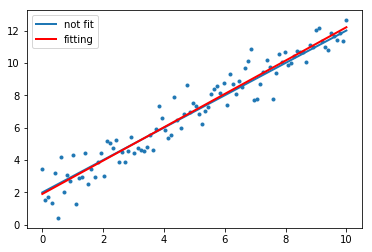

In [12]:
plt.scatter(x, yn, marker='.')
plt.plot(x, y, linewidth = 2)
plt.plot(x, func(x, *popt), color = 'red', linewidth = 2)
plt.legend(['not fit','fitting'], loc = 2)
plt.show()

### Gaussian model을 fitting하는 것을 알아봅시다. 

In [13]:
# Gaussian model을 리턴합니다.
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# 마찬가지로 0~10까지 100개 구간으로 나눈 x를 가지고
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2) # 답인 y들과
yn = y + 0.2*np.random.normal(size=len(x)) # noise가 낀 y값들을 만듭니다.
## 그런 후에 curve_fit을 하고 best fit model의 결과를 출력합니다.
popt, pcov = curve_fit(func, x, yn)


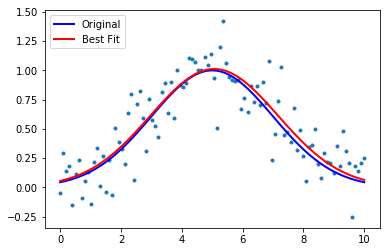

In [14]:
plt.scatter(x, yn, marker='.')
plt.plot(x, y, linewidth=2, color='blue')
plt.plot(x, func(x, *popt), color='red', linewidth=2)
plt.legend(['Original', 'Best Fit'], loc=2)
plt.show()

### 마지막으로 2개의 독립적인 Gaussian함수로 fitting하는 예제를 보여드리겠습니다. 

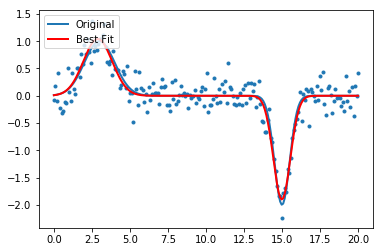

In [15]:
def func(x, a0, b0, c0, a1, b1, c1):
    return a0*np.exp(-(x-b0)**2/(2*c0**2)) + a1*np.exp(-(x-b1)**2/(2*c1**2))
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

#p0=Initial guess는 초기에 이 값들을 기준으로 optimal value를 찾으라는 설정값입니다.
initial_guess = [1, 3, 1, 1, 15, 1] 
popt, pcov = curve_fit(func, x, yn, p0=initial_guess)

plt.scatter(x, yn, marker='.')
plt.plot(x, y, linewidth=2)
plt.plot(x, func(x, *popt), color='red', linewidth=2)
plt.legend(['Original', 'Best Fit'], loc=2)
plt.show()